In [3]:
# 服装分类
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

In [15]:
# 加载数据
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# 数据清洗
# (60000, 28, 28) -> 转化成 (60000, 28 * 28)，把 [0, 255] 的值转成 [0, 1] 的值
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
# 将整型标签转为onehot
# train_labels = tf.keras.utils.to_categorical(train_labels)
# test_labels = tf.keras.utils.to_categorical(test_labels)

In [16]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000,)


In [17]:
# 建立模型
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
network.add(tf.keras.layers.MaxPooling2D((2, 2)))
network.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
network.add(tf.keras.layers.MaxPooling2D((2, 2)))
network.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
network.add(tf.keras.layers.Flatten())
network.add(tf.keras.layers.Dense(64, activation='relu'))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
print(network.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [22]:
# 训练模型
history = network.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 63s 68ms/step - loss: 0.2075 - accuracy: 0.9238
Epoch 2/20
938/938 [==============================] - 50s 53ms/step - loss: 0.1906 - accuracy: 0.9291
Epoch 3/20
938/938 [==============================] - 60s 64ms/step - loss: 0.1754 - accuracy: 0.9350
Epoch 4/20
938/938 [==============================] - 50s 54ms/step - loss: 0.1635 - accuracy: 0.9394
Epoch 5/20
938/938 [==============================] - 45s 48ms/step - loss: 0.1511 - accuracy: 0.9445
Epoch 6/20
938/938 [==============================] - 43s 46ms/step - loss: 0.1425 - accuracy: 0.9468
Epoch 7/20
938/938 [==============================] - 50s 53ms/step - loss: 0.1334 - accuracy: 0.9503
Epoch 8/20
938/938 [==============================] - 49s 52ms/step - loss: 0.1247 - accuracy: 0.9533
Epoch 9/20
938/938 [==============================] - 44s 47ms/step - loss: 0.1193 - accuracy: 0.9561
Epoch 10/20
938/938 [==============================] - 45s 48ms/step - loss: 0.113

In [23]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.5942 - accuracy: 0.9050
test_acc: 0.9049999713897705


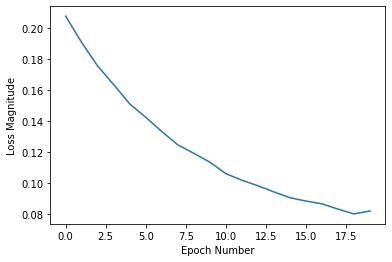

In [24]:
# 画图
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.show()